# Linear Regression

- All about approximating the linear function on our data
https://github.com/Santara/ML-MOOC-NPTEL/blob/master/lecture1/ML-Anirban_Tutorial1.ipynb - note book link for all models

y = wx+b # linear

y = W1x1 + W2x2 + b # multiple 

### Regression line

It is the line which make sure sum of the squared vertical distances b/w the data points and line is as `small` as possible  **`sum of the squared errors is minimum`**


#### learning parameters :
-         **w and b**

we will update the learning parameters by several **iterative methods**

1) Delta method or LMS method

#### Cost Function: 
-  It should be minimum as possible
- cost function is a measure of `how wrong the model is in terms of its ability to estimate the relationship between X and y`. This is typically expressed as a difference or **distance between the predicted value and the actual value**


####  Gradient Descent:

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/ - reference

Gradient descent is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression.
- The goal of the algorithm is to find model parameters (e.g. coefficients or weights) that minimize the error of the model on the training dataset. 

######  Stochastic Gradient Descent:

- SGD, is a variation of the gradient descent algorithm that calculates the error and **updates the model for each example** in the training dataset. effective than BGD

###### Batch Gradient Descent :

- Batch gradient descent is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only **updates the model after all training examples have been evaluated**.

##### Mini-Batch Gradient Descent:
- Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the **training dataset into small batches that are used to calculate model error and update model coefficients**.

# Code implementation - Type 1

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

Prepare data
------------
First  preparing some data for linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data:
$$y = \frac{x}{2}+sin(x)+\epsilon$$
Where $\epsilon \sim \mathcal{N}(0,1)$ is Gaussian noise.

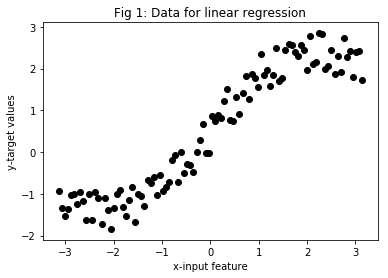

In [2]:
number_of_samples = 100

x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)   # deriving y

plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

### Split the dataset into training, validation and test sets
we do a $70\%-15\%-15\%$ random split of the data between the training, validation and test sets respectively.

In [3]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

Fit a line to the data
----------------------
Linear regression learns to fit a `hyperplane to our data in the feature space`. For one dimensional data, the hyperplane reduces to a **straight line**. We will fit a line to our data using [__sklearn.linear_model.LinearRegression__](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [5]:
model = LinearRegression()

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

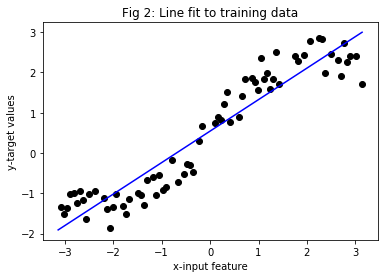

In [6]:
#Plot the line
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

Evaluate the model
------------------
Now that we have our model ready, we must evaluate our model.

In a linear regression scenario, its common to evaluate the model in terms of the **_mean squared error_** on the validation and test sets.

In [8]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print ('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  3.904775742866956 
Test MSE:  3.49877494296559


# Code implementation - Type 2